In [30]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [31]:
fair_probs = torch.ones([6]) / 6
fair_probs, multinomial.Multinomial(1, fair_probs).sample()

(tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]),
 tensor([0., 0., 0., 1., 0., 0.]))

In [32]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 2., 1., 4., 0.])

In [33]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1760, 0.1770, 0.1630, 0.1590, 0.1720, 0.1530])

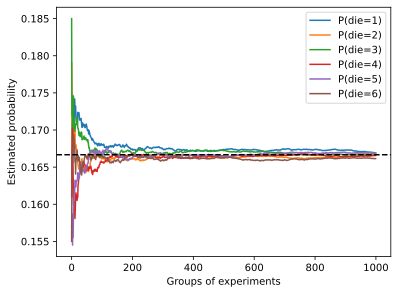

In [44]:
n, m = 1000, 1000
counts = multinomial.Multinomial(n, fair_probs).sample((m,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=1 / 6, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()